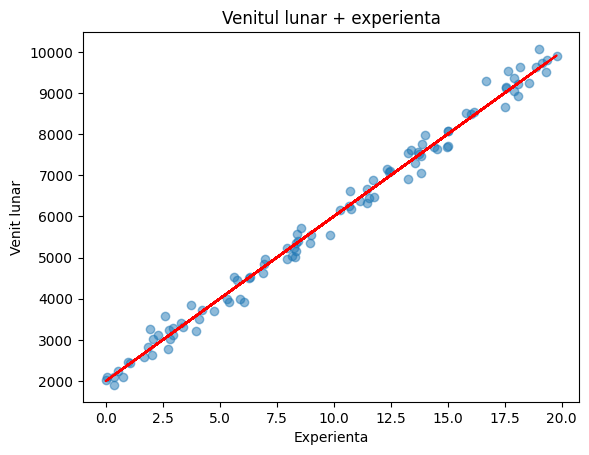

In [27]:
import numpy as np
import pymc as pm
import arviz as az
import matplotlib.pyplot as plt

alfa = 2000  #venit
beta = 400    #crestere venit
sigma = 250   #zgomot
eps_real = np.random.normal(0, sigma, size=100) #zgomot generat

np.random.seed(1)
x = np.random.uniform(0, 20, size=100)  #nr de ani experienta
y = alfa + beta * x + eps_real #modelul liniar

plt.scatter(x, y, alpha=0.5)
plt.plot(x, alfa + beta * x, color='red', label="Linia de regresie")
plt.xlabel('Experienta')
plt.ylabel('Venit lunar')
plt.title('Venitul lunar + experienta')
plt.show()


Output()

Output()

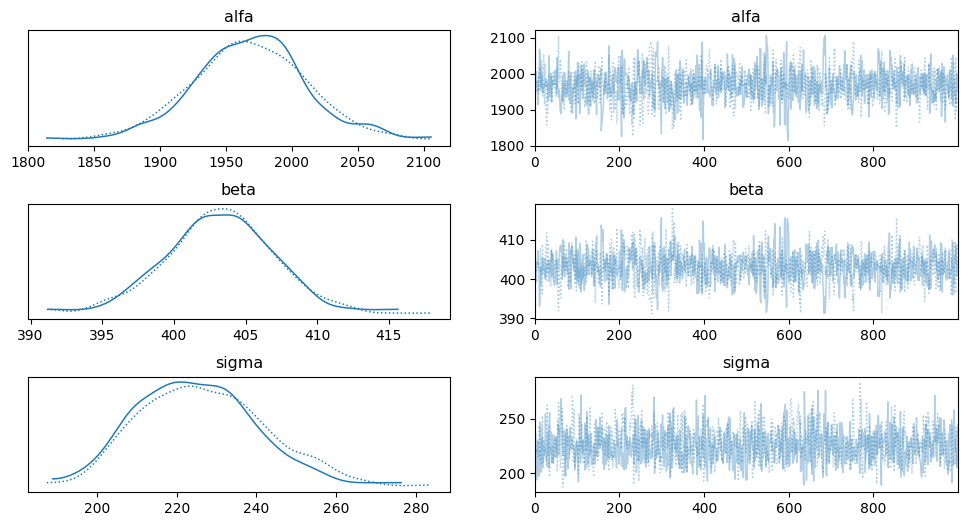

           mean      sd  hdi_2.5%  hdi_97.5%  mcse_mean  mcse_sd  ess_bulk  \
alfa   1967.990  43.533  1885.402   2061.726      1.396    0.989     987.0   
beta    403.199   3.811   395.021    410.071      0.123    0.087     963.0   
sigma   225.956  15.499   198.973    257.029      0.472    0.336    1125.0   

       ess_tail  r_hat  
alfa      771.0    1.0  
beta      743.0    1.0  
sigma    1067.0    1.0  


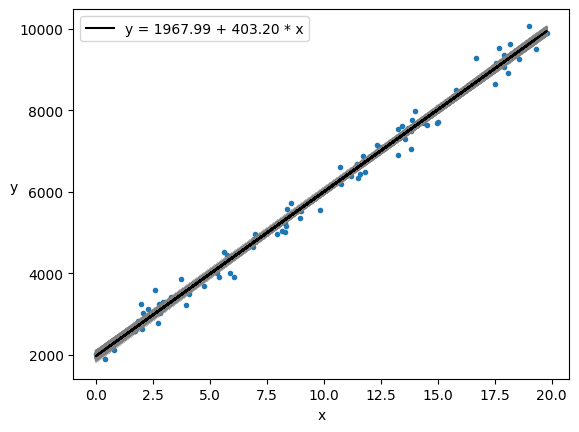

In [37]:
import pymc as pm
import arviz as az

with pm.Model() as model:
    alfa = pm.Normal("alfa", mu=0, sigma=1000)
    beta = pm.Normal("beta", mu=0, sigma=1000)
    sigma = pm.HalfNormal("sigma", sigma=100)

    mu = alfa + beta * x

    y_observatii = pm.Normal("y_observatii", mu=mu, sigma=sigma, observed=y)

    trace = pm.sample(1000, return_inferencedata=True)

az.plot_trace(trace)
plt.subplots_adjust(hspace=0.5)
plt.show()

print(az.summary(trace, hdi_prob=0.95))

plt.plot(x, y, 'C0.')
posterior_g = trace.posterior.stack(samples={"chain", "draw"})
alpha_m = posterior_g['alfa'].mean().item()
beta_m = posterior_g['beta'].mean().item()
draws = range(0, posterior_g.samples.size, 10)
plt.plot(x, posterior_g['alfa'][draws].values

+ posterior_g['beta'][draws].values * x[:,None],
c='gray', alpha=0.5)
plt.plot(x, alpha_m + beta_m * x, c='k',
label=f'y = {alpha_m:.2f} + {beta_m:.2f} * x')
plt.xlabel('x')
plt.ylabel('y', rotation=0)
plt.legend()